### Word2Vec


- Word2Vec is a 2-layer neural network that processes text. Its input is a text corpus and output is a set of vectors.

- Input layer, neural layer(300 neurons recommended by Google), output layer
- Vocabulary size = V, No. of Neurons = N. Input weight matrix(W) = N\*V. Output weight Matrix(W') = V\*N 
- Input Layer
 - Each vector represented as 1 hot encoding vector(u). i.e. all entries in the vector are 0 except one entry(k) against that word is 1
 - Random weights are assigned to W at the start of the training.
 - The $k^{th}$ row of the W represents the word-embedding vector for that word
 
- Neural Layer
 - No activation function is used in Neural Layer
 - Number of Neurons = N
 
- Output Layer
 - We represent the output vector as v
 - Output weight matrix is $VXN$
 - Softmax Activation function is used at output layer.
 - Softmax converts the Output vector to a probability distribution. The sum of all the V entries of the output vector = 1
 - Error is calculated by subtracting output vector from input vector $ \vec{v} - \vec{u} $
 - Error is propagated and weights W and W' are adjusted by Back Propagation algorithm
 
- After the training is complete the input weight matrix(W) is saved as the trained model. Each row of the matrix represents one *N-dim word-embeddings* of the V input words.
   

- Word2Vec vectorizes words and by doing so it makes Natural Language computer readeable. We can start to perform powerful mathematical operations on words to detect their similarities.

- Word2vec is a method of computing vector representations of words introduced by a team of researchers at Google led by Tomas Mikolov. Google hosts an open-source version of Word2vec released under an Apache 2.0 license

- Word2Vec works under the principle that words are just discrete states and we are looking for simply transitional probabilities between those states: the likelyhood that they will co-occur

- The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That way it can detect similarity mathematically. It makes use of word features - like the context of the word (other words surrounding a word)

- Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic

- The output of the Word2vec neural net is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning net or simply queried to detect relationships between words.



### Working of Word2Vec

- Word2Vec encodes each word as a vector and then trains the word against other words that neighbours them in the input corpus
- It does so by one of the two ways
 - Continuous Bag of Words (CBOW): It uses a context to predict a single word between them.
 - Skip Gram: It uses one word, to predict a context surrounding that word
 
- It has been observed Skip-Gram provides more accurate results when trained with a large input corpus

### Cosine Similarity

- Cosine Similarity is used to compute the similarity between 2 vectors.
- Value of Cosine varies between [-1, 1]

### Word Embeddings

- The vectors we use to represent words are called *Neural Word Embeddings*

## Import Gensim library for Word2Vec

In [24]:
import gensim 
from gensim.models import Word2Vec 
from nltk import word_tokenize, sent_tokenize

### Load pre-trained Glove Models

In [ ]:
# Import gensim libraries
from gensim.models import KeyedVectors

In [ ]:
# Import pre-trained Glove Word2Vec file
filename = '/data/critt/shared/Spring19/w2v/glove/glove.6B.200d.word2vec.txt'
# Load the model
modelGV = KeyedVectors.load_word2vec_format(filename, binary=False)

### Train using BNC segments

In [140]:
class MySentences(object):
    
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        #ml = ["q","m","t"]
        for line in open('/data/critt/shared/Spring19/lemmaLexicon/BNC.seg'):
            #print(line)
            yield word_tokenize(line)
 

In [141]:
sent = MySentences('/data/critt/shared/Spring19/lemmaLexicon/BNC.seg')
#sent

In [149]:
i=0
for s in sent:
    i+=1
    if i < 8:
        print(s)
    else:    
        break

['FACTSHEET', 'WHAT', 'IS', 'AIDS', '?']
['AIDS', '(', 'Acquired', 'Immune', 'Deficiency', 'Syndrome', ')', 'is', 'a', 'condition', 'caused', 'by', 'a', 'virus', 'called', 'HIV', '(', 'Human', 'Immuno', 'Deficiency', 'Virus', ')', '.']
['This', 'virus', 'affects', 'the', 'body', "'s", 'defence', 'system', 'so', 'that', 'it', 'can', 'not', 'fight', 'infection', '.']
['How', 'is', 'infection', 'transmitted', '?']
['through', 'unprotected', 'sexual', 'intercourse', 'with', 'an', 'infected', 'partner', '.']
['through', 'infected', 'blood', 'or', 'blood', 'products', '.']
['from', 'an', 'infected', 'mother', 'to', 'her', 'baby', '.']


In [92]:
i = 0 
for line in open('/data/critt/shared/Spring19/lemmaLexicon/BNC.seg','r').readlines():
    if i < 5:
        print(line)
        i+=1

 FACTSHEET WHAT IS AIDS ? 

AIDS ( Acquired Immune Deficiency Syndrome ) is a condition caused by a virus called HIV ( Human Immuno Deficiency Virus ) . 

This virus affects the body 's defence system so that it can not fight infection . 

How is infection transmitted ? 

through unprotected sexual intercourse with an infected partner . 



In [89]:
sent

In [25]:
bnc = open('/data/critt/shared/Spring19/lemmaLexicon/BNC.seg','r').readlines()

In [26]:
%%time
# Train our Word2Vec on 1 million bnc segments
articles = [word_tokenize(s) for s in sent_tokenize(' '.join(bnc[:1000000]))]

CPU times: user 4min 50s, sys: 2.54 s, total: 4min 53s
Wall time: 4min 53s


In [150]:
%%time
model_bnc = gensim.models.Word2Vec(sent, min_count = 1, size = 100, window = 5) 

CPU times: user 3h 1min 35s, sys: 17.7 s, total: 3h 1min 53s
Wall time: 2h 46min 17s


In [161]:
model_bnc.corpus_total_words

117314327

In [160]:
model_bnc.wv.save_word2vec_format('bnc_w2v.txt_binary',binary=True)

In [ ]:
model_bnc.wv.save_word2vec_format('bnc_w2v.txt_binary',binary=True)

In [163]:
model_bnc.wv.most_similar(positive="chair")

[('seat', 0.7962860465049744),
 ('sofa', 0.7366054058074951),
 ('couch', 0.728851318359375),
 ('desk', 0.7240298390388489),
 ('armchair', 0.7151702046394348),
 ('bench', 0.7016005516052246),
 ('doorway', 0.6909934282302856),
 ('bed', 0.6848758459091187),
 ('head', 0.6763295531272888),
 ('bunk', 0.6759426593780518)]

### Import TPR ST table

In [28]:
# import kent library
import sys
sys.path.insert(0, '/data/critt/shared/Spring19/')

import kent
import importlib
importlib.reload(kent)

<module 'kent' from '/data/critt/shared/Spring19/kent.py'>

In [33]:
# read the PARA19 study data
STdf = kent.readTPDDBtables(["PARA19/Tables/"], "*st", path="/data/critt/tprdb/KENT/")
# All the words in SToken of STdf
source_words = list(set(STdf['SToken'].tolist()))

In [30]:
source_words_synonym_dic = {}
for word in source_words:
    if word in model_bnc.wv.vocab:
        source_words_synonym_dic[word] = model_bnc.wv.most_similar(positive=word)
        

In [31]:
source_word_syn = {}
for w in source_words_synonym_dic:
    source_word_syn[w] = [s[0] for s in source_words_synonym_dic[w]]

In [37]:
STdf[:10][['Task','SToken']]

,Task,SToken
0,C,Killer
1,C,nurse
2,C,receives
3,C,four
4,C,life
5,C,sentences
6,C,Hospital
7,C,nurse
8,C,Colin
9,C,Norris


In [43]:
print(f"Killer: {source_word_syn['Killer']}")
print(f"receives: {source_word_syn['receives']}")
print(f"four: {source_word_syn['four']}")
print(f"life: {source_word_syn['life']}")

Killer: ['Ninja', 'avellana', 'Ads', 'Steak', 'Camera', 'Dwarf', 'Jolly', 'ORKNEY', 'Corylus', "s'il"]
receives: ['pays', 'collects', 'gives', 'carries', 'delivers', 'earns', 'loses', 'received', 'offers', 'provides']
four: ['three', 'five', 'six', 'seven', 'eight', 'two', 'ten', 'nine', 'twelve', 'fifteen']
life: ['lifestyle', 'lives', 'childhood', 'experience', 'society', 'adolescence', 'humanity', 'enjoyment', 'consciousness', 'happiness']


#### Find Top-10 Similar words

In [45]:
modelGV.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754295349121),
 ('throne', 0.5775109529495239),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399126410484314),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]

In [46]:
model_bnc.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('widow', 0.7012261748313904),
 ('deceased', 0.6782904863357544),
 ('daughter', 0.6751697063446045),
 ('queen', 0.6750183701515198),
 ('lord', 0.6652630567550659),
 ('Queen', 0.6567853093147278),
 ('bishop', 0.6557954549789429),
 ('emperor', 0.6454355716705322),
 ('King', 0.6448272466659546),
 ('son', 0.6447246074676514)]

#### Logical Word Analogies

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [ ]:
def pca(words):
    # extract smaller model 
    X = modelGV[words]

    # fit a 2d PCA model to the vectors
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

In [47]:
similarity_list = []
results = []
similarity_list.append(['woman','king','man'])
similarity_list.append(['woman','boy','man'])
similarity_list.append(['woman','son','man'])
similarity_list.append(['paris','italy','france'])
similarity_list.append(['paris','germany','france'])
for ll in similarity_list:
    result = modelGV.most_similar(positive=[ll[0], ll[1]], negative=[ll[2]], topn=1)
    results.append(result[0][0])
    print(f"{ll[2]}:{ll[0]} = {ll[1]}: {result[0]}")

man:woman = king: ('queen', 0.6978678703308105)
man:woman = boy: ('girl', 0.869331955909729)
man:woman = son: ('daughter', 0.8827179670333862)
france:paris = italy: ('rome', 0.758540689945221)
france:paris = germany: ('berlin', 0.8416252732276917)


#### Visualization using Principal Component Analysis (PCA)

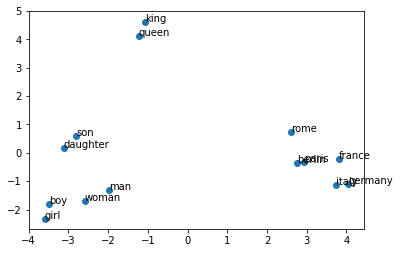

In [10]:
words = set([w for wl in similarity_list for w in wl])
words = words.union(set(results))

# extract smaller model 
X = modelGV[words]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

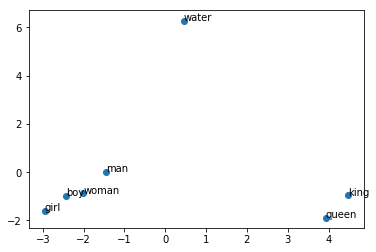

In [13]:
words = ['woman','girl','boy','man','king','queen','water']
pca(words)

In [171]:
modelGV.similarity("india","china")

0.5244425

In [166]:
modelGV.most_similar(positive=['arndt'], topn=20)

[('wiesner', 0.48696455359458923),
 ('judith', 0.4730544686317444),
 ('baumann', 0.4726886749267578),
 ('beckert', 0.4449569582939148),
 ('moritz', 0.4373289942741394),
 ('gottlieb', 0.43605926632881165),
 ('walchhofer', 0.4342966675758362),
 ('steuer', 0.432207852602005),
 ('ingo', 0.42808228731155396),
 ('blane', 0.42451101541519165),
 ('sorosky', 0.4201039671897888),
 ('greis', 0.41952741146087646),
 ('stephan', 0.41931185126304626),
 ('herbst', 0.41748183965682983),
 ('winkler', 0.4173733592033386),
 ('gruber', 0.41582006216049194),
 ('kohler', 0.4149934947490692),
 ('chernuchin', 0.4118078351020813),
 ('lubet', 0.41145944595336914),
 ('uslan', 0.4111972451210022)]

In [55]:
modelGV.similarity("sentence", "vocabulary")

0.21868509